Define these constants:

In [133]:
import os.path

# LOAD_FILES_CAP = 50  # for testing load only some files (loading slow)
LOAD_FILES_CAP = None
# output_root = '/Users/adam/pschool/bakalarka/cryptic_output/output'  # unzipped tree with json outputs
output_root = '/Users/adam/pschool/bakalarka/cryptic_output/output 2'  # unzipped tree with json outputs

In [134]:
import json
from pathlib import Path
from typing import Iterable

import pandas as pd


def load_df(json_files: Iterable[Path]):
    super_df = pd.DataFrame()

    json_files = list(json_files)
    if LOAD_FILES_CAP:
        json_files = list(json_files)[:LOAD_FILES_CAP]  # testing hack

    total_files = len(json_files)

    for i, json_file in enumerate(json_files):
        with json_file.open() as f:
            json_output = json.load(f)

        df = pd.json_normalize(json_output, 'binding_sites', ['apo_pdb_code', 'holo_pdb_code', 'apo_chain_id', 'holo_chain_id'])
        super_df = pd.concat([super_df, df], ignore_index=True)

        if i % 10 == 0:
            print(f'\rloading... {i} / {total_files} done', end='')

    return super_df

In [135]:
import pickle

files = Path(output_root).rglob('*.json')

if os.path.exists('df.pickle'):
    # load pickled df
    with open('df.pickle', 'rb') as handle:
        df = pickle.load(handle)
else:
    df = load_df(files)

In [136]:
# je klidne vetsi nez pocet paru, protoze je radek za kazdy ligand, nikoliv pár...
df

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,analyses.method4.apo_bs_blocked_residues__by_blocking_atoms,atom_count_statistic.binding_atoms,atom_count_statistic.binding_atoms_observed_in_apo,atom_count_statistic.atoms_of_binding_residues_in_both,atom_count_statistic.atoms_of_binding_residues_missing_in_holo,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id
0,RFT,[157],0.235313,0.255749,0.255749,108.813930,106.436640,1,1,1,...,1,6,6,6,0,4,6wyg,6wyf,A,A
1,RFT,"[164, 45, 94]",0.577257,0.614879,0.614879,82.939834,85.420435,0,0,0,...,0,3,3,17,0,4,6wyg,6wyh,A,B
2,RFT,[157],0.317696,0.314098,0.314098,108.550272,109.494690,0,0,0,...,0,5,5,6,0,0,6wyg,6wyh,A,B
3,RFT,[157],0.346098,0.366367,0.366367,108.722998,106.436640,0,0,0,...,0,6,6,6,0,4,6wyg,6wyf,C,A
4,RFT,"[164, 45, 94]",0.730723,0.849326,0.849326,87.476912,85.420435,0,0,0,...,0,3,3,17,0,4,6wyg,6wyh,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737105,IXZ,"[217, 116, 35, 81, 304, 221, 219, 33, 79, 226,...",35.815914,35.041840,35.041840,383.087170,397.146905,5,4,5,...,1,35,35,118,103,0,5p3l,3wz6,A,A
1737106,IXY,"[302, 37, 33, 79, 125, 221, 116, 35, 119, 304,...",35.949269,35.866933,35.866933,465.143603,498.159988,19,16,10,...,3,41,41,159,143,0,5p3l,3wz7,A,A
1737107,IXV,"[83, 300, 33, 80, 10, 222, 226, 79, 221, 116, ...",54.334508,54.377497,54.377497,453.171410,445.745519,8,6,7,...,1,36,36,140,121,0,5p3l,3wz8,A,A
1737108,PEG,"[68, 90, 67, 62, 61, 69]",54.554148,54.548213,54.548213,142.983098,131.290774,3,3,3,...,0,13,13,44,41,3,5p3l,3wz8,A,A


In [163]:
df.sort_values('atom_count_statistic.binding_atoms')[:10]



,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio,sasa_decrease_in_apo,holo_to_apo_sasa_ratio
802931,LYE,[47],61.122765,61.122765,61.122765,61.416960,66.857679,2,1,1,...,7,1j1x,6syc,Y,A,1.0,1,1.0,0.081378,1.088587
270815,GOL,[8],0.123118,0.123118,0.123118,36.750266,36.998750,0,0,0,...,0,5p6g,5qbf,A,A,0.0,1,0.0,0.006716,1.006761
896736,GOL,[8],46.514777,46.514777,46.514777,37.043583,36.998750,0,0,0,...,0,5r39,5qbf,A,A,0.0,1,0.0,-0.001212,0.998790
1288313,LYE,[47],17.407658,17.407658,17.407658,67.483913,66.857679,0,0,0,...,7,2lzt,6syc,A,A,0.0,1,0.0,-0.009367,0.990720
1015522,LYE,[47],17.951914,17.951914,17.951914,66.079674,66.857679,0,0,0,...,7,1lpi,6syc,A,A,0.0,1,0.0,0.011637,1.011774
656281,LYE,[47],18.137630,18.137630,18.137630,67.545510,66.857679,0,0,0,...,7,1jit,6syc,A,A,0.0,1,0.0,-0.010288,0.989817
1203272,GOL,[8],0.022000,0.022000,0.022000,36.457089,36.520495,0,0,0,...,0,5p7l,5qba,A,A,0.0,1,0.0,0.001736,1.001739
470718,GOL,[8],0.098266,0.098266,0.098266,37.210093,36.998750,0,0,0,...,0,5ozx,5qbf,A,A,0.0,1,0.0,-0.005712,0.994320
896715,GOL,[8],46.475913,46.475913,46.475913,37.043583,36.520495,0,0,0,...,0,5r39,5qba,A,A,0.0,1,0.0,-0.014323,0.985879
470697,GOL,[8],0.137135,0.137135,0.137135,37.210093,36.520495,0,0,0,...,0,5ozx,5qba,A,A,0.0,1,0.0,-0.018882,0.981467


In [137]:
#missing atom of BS residues = 0, apo and holo
# df = df[]

# ale hlavne atom_count_statistic.binding_atoms_observed_in_apo == atom_count_statistic.binding_atoms

len(df[df['atom_count_statistic.binding_atoms_observed_in_apo']==df['atom_count_statistic.binding_atoms']])
df = df[df['atom_count_statistic.binding_atoms_observed_in_apo']==df['atom_count_statistic.binding_atoms']]

In [138]:
print('binding sites', len(df))
print()
print('unique pairs', len(df[['apo_pdb_code', 'holo_pdb_code', 'apo_chain_id', 'holo_chain_id']].drop_duplicates()))
print('unique apo chains', len(df[['apo_pdb_code', 'apo_chain_id']].drop_duplicates()))
print('unique holo chains', len(df[['holo_pdb_code', 'holo_chain_id']].drop_duplicates()))
print('unique apo structures', df['apo_pdb_code'].nunique())
print('unique holo structures', df['holo_pdb_code'].nunique())

binding sites 1699707

unique pairs 919843
unique apo chains 28362
unique holo chains 48065
unique apo structures 15912
unique holo structures 27205


## Blocking atoms method

In [139]:
# pro histogram podílu blocked_BS_atoms / BS_atoms

df['blocked_bs_atoms__ratio'] = df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] / df['atom_count_statistic.binding_atoms_observed_in_apo']

df['bs_residue_count'] = df.residue_ids.apply(len)

df['blocked_bs_residues__ratio'] = df['analyses.method4.apo_bs_blocked_residues__by_blocking_atoms'] / df.bs_residue_count


/var/folders/yd/d0qwckdj493c0xxb37j79t380000gn/T/ipykernel_35612/1753811280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blocked_bs_atoms__ratio'] = df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] / df['atom_count_statistic.binding_atoms_observed_in_apo']
/var/folders/yd/d0qwckdj493c0xxb37j79t380000gn/T/ipykernel_35612/1753811280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bs_residue_count'] = df.residue_ids.apply(len)
/var/folders/yd/d0qwckdj493c0xxb37j79t380000gn/T/ip

<AxesSubplot:xlabel='blocked_bs_atoms__ratio', ylabel='Proportion'>

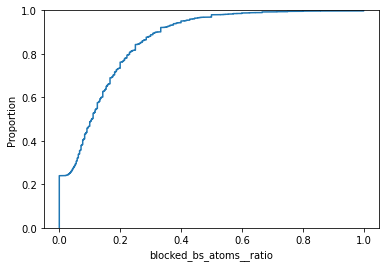

In [141]:
import seaborn as sns

sns.ecdfplot(df, x='blocked_bs_atoms__ratio')

<AxesSubplot:xlabel='blocked_bs_residues__ratio', ylabel='Proportion'>

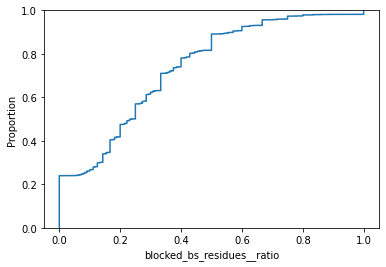

In [142]:
sns.ecdfplot(df, x='blocked_bs_residues__ratio')

### Binding site size

dává smysl, že takto definované cryptic budou mít méně binding atoms v průměru, ale asi to není tak hrozné:

In [143]:
print('median binding site size:', df['atom_count_statistic.binding_atoms'].median())

median binding site size: 15.0


kdyby cryptic := df.blocked_bs_atoms__ratio > 0.4

In [144]:
print('cryptic median binding site size:', df[df.blocked_bs_atoms__ratio > 0.4]['atom_count_statistic.binding_atoms'].median())
print('non-cryptic median binding site size:', df[df.blocked_bs_atoms__ratio <= 0.4]['atom_count_statistic.binding_atoms'].median())


cryptic median binding site size: 9.0
non-cryptic median binding site size: 15.0


kdyby cryptic := df.blocked_bs_atoms__ratio > 0.2

In [145]:
print('cryptic median binding site size:', df[df.blocked_bs_atoms__ratio > 0.2]['atom_count_statistic.binding_atoms'].median())
print('non-cryptic median binding site size:', df[df.blocked_bs_atoms__ratio <= 0.2]['atom_count_statistic.binding_atoms'].median())

cryptic median binding site size: 13.0
non-cryptic median binding site size: 16.0


## Aggregation

Rows are now binding sites. Aggregate them by pair, and by apo chain. As representative rows for each pair/apo_chain use the binding sites most likely to be cryptic, i.e. those with maximal blocked_bs_atoms__ratio.

In [146]:
# aggregated by pair (i.e. a pair has multiple binding sites -> choose max/min/avg from the describing values)
def groupby_and_select(df, column, groupby, min_or_max: str):
    assert min_or_max in ('min', 'max')
    ascending = True if min_or_max == 'min' else False
    return df.sort_values(column, ascending=ascending).drop_duplicates(groupby)

pair_id_columns = ['apo_pdb_code', 'holo_pdb_code', 'apo_chain_id', 'holo_chain_id']

min_pairs = groupby_and_select(df, 'blocked_bs_atoms__ratio', pair_id_columns, 'min')
max_pairs = groupby_and_select(df, 'blocked_bs_atoms__ratio', pair_id_columns, 'max')
avg_pairs = df.groupby(pair_id_columns).agg('mean')


# aggregated by apo choin
apo_chain_columns = ['apo_pdb_code', 'apo_chain_id']
min_apo_chains = groupby_and_select(df, 'blocked_bs_atoms__ratio', apo_chain_columns, 'min')
max_apo_chains = groupby_and_select(df, 'blocked_bs_atoms__ratio', apo_chain_columns, 'max')
avg_apo_chains = df.groupby(apo_chain_columns).agg('mean')


In [168]:
xd = max_apo_chains[(max_apo_chains['atom_count_statistic.binding_atoms'] > 10)  & (max_apo_chains.blocked_bs_atoms__ratio >= 0.4)]
xd

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,atom_count_statistic.atoms_of_binding_residues_in_both,atom_count_statistic.atoms_of_binding_residues_missing_in_holo,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio
183893,PC,"[150, 81, 61, 138, 139, 140, 147]",63.342694,64.005020,64.005020,167.224165,150.832056,44,14,14,...,61,0,0,3pvn,1b09,F,C,1.0,7,1.000000
944493,PFL,"[532, 579, 502, 531]",18.417826,18.517022,18.517022,28.913874,117.247487,29,13,11,...,34,0,0,6m4r,1e7a,A,A,1.0,4,1.000000
846547,MPD,"[90, 92, 131, 129, 130, 198]",17.716406,18.792406,18.792406,3.490973,65.351632,38,14,12,...,57,0,0,2b4i,2b4h,C,B,1.0,6,1.000000
846535,MPD,"[90, 92, 131, 129, 130, 198]",25.767886,25.921675,25.921675,5.928172,65.351632,39,15,12,...,57,0,0,2b4i,2b4h,A,B,1.0,6,1.000000
518524,GOL,"[93, 74, 70, 69, 45, 46]",22.468086,22.096014,22.096014,9.700741,82.624653,29,19,11,...,39,0,0,4pun,5lpt,A,A,1.0,6,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748894,GLC,"[78, 413, 414, 82, 79]",25.200132,26.304506,26.304506,169.154610,155.963973,14,6,11,...,52,0,0,5vqz,2be2,B,B,0.4,5,0.400000
234793,8OG,"[153, 83, 38, 71, 16, 15, 84]",60.611816,63.076436,63.076436,278.660205,277.359574,11,7,8,...,61,0,0,5qk2,3l85,A,B,0.4,7,0.714286
612433,8OG,"[83, 84, 71, 153, 38, 15, 16]",75.771917,76.243532,76.243532,274.187731,277.359574,12,7,8,...,61,0,0,6gru,3l85,B,B,0.4,7,0.571429
147163,S12,"[99, 49, 50, 88, 52, 48]",15.878058,16.266476,16.266476,210.236720,273.082871,23,12,13,...,64,0,0,1bet,4eax,A,B,0.4,6,0.833333


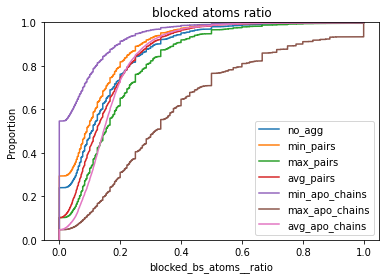

In [147]:
sns.ecdfplot(df, x='blocked_bs_atoms__ratio', label='no_agg')
ax = sns.ecdfplot(min_pairs, x='blocked_bs_atoms__ratio', label='min_pairs')
sns.ecdfplot(max_pairs, x='blocked_bs_atoms__ratio', label='max_pairs')
sns.ecdfplot(avg_pairs, x='blocked_bs_atoms__ratio', label='avg_pairs')

sns.ecdfplot(min_apo_chains, x='blocked_bs_atoms__ratio', label='min_apo_chains')
sns.ecdfplot(max_apo_chains, x='blocked_bs_atoms__ratio', label='max_apo_chains').set_title('blocked atoms ratio')
sns.ecdfplot(avg_apo_chains, x='blocked_bs_atoms__ratio', label='avg_apo_chains')

ax.legend()

# todo taky by slo min_max_chains (min pres binding sites, max pres pairs a obracene treba)

Min pairs = páry, kde za reprezentativní binding site vyberu tu minimální (minimální wrt. blocked atoms ratio)
Max pairs obdobně.
Avg - všechny hodnoty pro všechny binding sites (k danému páru) se vyprůměrují (nemusí dávat smysl)

Min apo chains - apo chainy, za reprezentativní binding site vybírám tu minimální ve všech párech i jejich binding sites

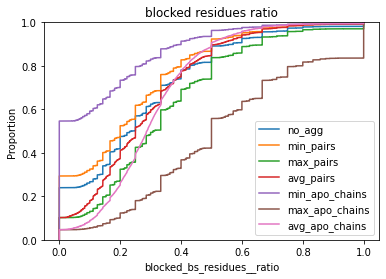

In [148]:
sns.ecdfplot(df, x='blocked_bs_residues__ratio', label='no_agg')
ax = sns.ecdfplot(min_pairs, x='blocked_bs_residues__ratio', label='min_pairs')
sns.ecdfplot(max_pairs, x='blocked_bs_residues__ratio', label='max_pairs')
sns.ecdfplot(avg_pairs, x='blocked_bs_residues__ratio', label='avg_pairs')


sns.ecdfplot(min_apo_chains, x='blocked_bs_residues__ratio', label='min_apo_chains')
sns.ecdfplot(max_apo_chains, x='blocked_bs_residues__ratio', label='max_apo_chains').set_title('blocked residues ratio')
sns.ecdfplot(avg_apo_chains, x='blocked_bs_residues__ratio', label='avg_apo_chains')
ax.legend()


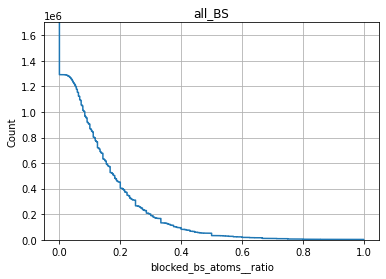

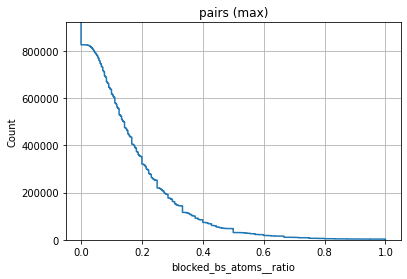

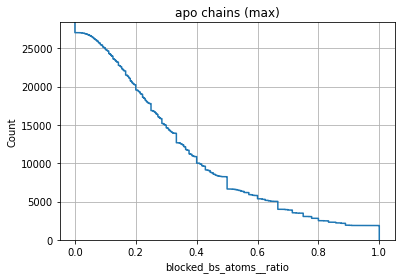

In [149]:
from matplotlib import pyplot as plt



for label, bs_df in (('all_BS',df), ('pairs (max)', max_pairs), ('apo chains (max)', max_apo_chains)):
    sns.ecdfplot(bs_df, x='blocked_bs_atoms__ratio', stat='count', complementary=True).set_title(label)
    plt.grid()
    plt.show()


In [150]:
print('max_apo_chains median binding site size:', max_apo_chains['atom_count_statistic.binding_atoms'].median())

max_apo_chains median binding site size: 12.0


In [151]:
import numpy as np
print(len(max_apo_chains))
for lower_bound in np.arange(0, 1, 0.1):
    cryptic = max_apo_chains[max_apo_chains.blocked_bs_atoms__ratio >= lower_bound]
    count = len(cryptic)
    print(f'lower bound: {lower_bound:.1f}, count:{count}, percent {100*count/len(max_apo_chains):.0f}, '
          f'BS size mean [atoms]: {cryptic["atom_count_statistic.binding_atoms"].mean():.1f}, '
          f'median: {cryptic["atom_count_statistic.binding_atoms"].median()}, '
          f'stddev: {cryptic["atom_count_statistic.binding_atoms"].std():.1f}',
          )


28362
lower bound: 0.0, count:28362, percent 100, BS size mean [atoms]: 16.8, median: 12.0, stddev: 14.4
lower bound: 0.1, count:25038, percent 88, BS size mean [atoms]: 16.0, median: 12.0, stddev: 13.6
lower bound: 0.2, count:20233, percent 71, BS size mean [atoms]: 13.8, median: 10.0, stddev: 11.7
lower bound: 0.3, count:14628, percent 52, BS size mean [atoms]: 11.2, median: 9.0, stddev: 9.4
lower bound: 0.4, count:10861, percent 38, BS size mean [atoms]: 9.1, median: 7.0, stddev: 7.3
lower bound: 0.5, count:8239, percent 29, BS size mean [atoms]: 7.3, median: 6.0, stddev: 5.8
lower bound: 0.6, count:5365, percent 19, BS size mean [atoms]: 6.2, median: 5.0, stddev: 4.7
lower bound: 0.7, count:3896, percent 14, BS size mean [atoms]: 5.5, median: 5.0, stddev: 3.9
lower bound: 0.8, count:2811, percent 10, BS size mean [atoms]: 4.7, median: 3.0, stddev: 3.5
lower bound: 0.9, count:1916, percent 7, BS size mean [atoms]: 3.3, median: 3.0, stddev: 2.6


In [152]:
df["atom_count_statistic.binding_atoms"].describe()

count    1.699707e+06
mean     1.857597e+01
std      1.244569e+01
min      1.000000e+00
25%      1.100000e+01
50%      1.500000e+01
75%      2.200000e+01
max      3.020000e+02
Name: atom_count_statistic.binding_atoms, dtype: float64

## SASA

<AxesSubplot:xlabel='analyses.method3.bs_atoms_sasa__apo', ylabel='analyses.method3.bs_atoms_sasa__holo'>

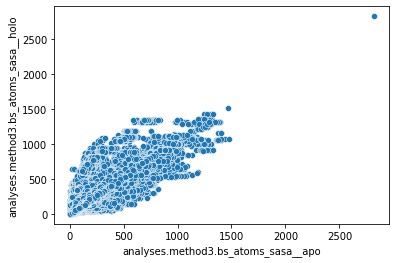

In [153]:
sns.scatterplot(data=df, x='analyses.method3.bs_atoms_sasa__apo', y='analyses.method3.bs_atoms_sasa__holo')


In [154]:


# also compare (on a scatter with BS SASA and the rmsd)
df['sasa_decrease_in_apo']  = (df['analyses.method3.bs_atoms_sasa__holo'] - df['analyses.method3.bs_atoms_sasa__apo']) / df['analyses.method3.bs_atoms_sasa__holo']

df['holo_to_apo_sasa_ratio'] = df['analyses.method3.bs_atoms_sasa__holo'] / df['analyses.method3.bs_atoms_sasa__apo']




/var/folders/yd/d0qwckdj493c0xxb37j79t380000gn/T/ipykernel_35612/3726956144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sasa_decrease_in_apo']  = (df['analyses.method3.bs_atoms_sasa__holo'] - df['analyses.method3.bs_atoms_sasa__apo']) / df['analyses.method3.bs_atoms_sasa__holo']
/var/folders/yd/d0qwckdj493c0xxb37j79t380000gn/T/ipykernel_35612/3726956144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['holo_to_apo_sasa_ratio'] = df['analyses.method3.bs_atoms_sasa__holo'] / df['analyses.met

(0.0, 4.0)

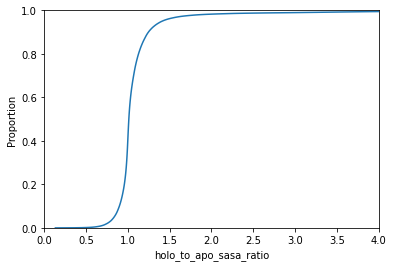

In [155]:
ax = sns.ecdfplot(df, x='holo_to_apo_sasa_ratio')
ax.set_xlim((0, 4))


In [186]:
sasa_cryptic = df[(df.holo_to_apo_sasa_ratio > 1.5) & (df['atom_count_statistic.binding_atoms'] > 10)]
sasa_cryptic = sasa_cryptic.sort_values('holo_to_apo_sasa_ratio', ascending=False)
sasa_cryptic

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio,sasa_decrease_in_apo,holo_to_apo_sasa_ratio
968019,NTA,"[63, 124, 296, 206, 188, 125, 95]",40.663676,41.279100,41.279100,1.658134,197.982954,56,23,14,...,0,1a8e,4h0w,A,A,0.812500,7,1.000000,0.991625,119.401053
968030,NTA,"[63, 124, 296, 206, 188, 125, 95]",32.362772,32.947192,32.947192,1.768046,197.982954,55,22,13,...,0,1a8f,4h0w,A,A,0.750000,7,0.857143,0.991070,111.978406
242109,4CF,"[34, 99, 98, 86, 97, 27, 100, 88]",8.941195,9.671746,9.671746,0.953818,91.242865,6,1,3,...,0,2p44,3oqy,A,A,0.000000,8,0.000000,0.989546,95.660690
628026,4CF,"[34, 86, 97, 98, 100, 88, 27, 99]",9.452254,9.190747,9.190747,1.049708,91.242865,6,1,3,...,0,3qsk,3oqy,A,A,0.000000,8,0.000000,0.988495,86.922127
1269656,4CF,"[98, 97, 27, 34, 88, 99, 100, 86]",33.405392,32.787571,32.787571,1.050312,91.242865,8,3,5,...,0,2p47,3oqy,A,A,0.076923,8,0.125000,0.988489,86.872117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656368,SPD,"[58, 65, 61, 60, 57]",12.259975,12.397919,12.397919,133.845150,200.770946,40,16,10,...,0,4ygo,4mhd,E,A,0.818182,5,1.000000,0.333344,1.500024
1156899,GOL,"[98, 10, 97, 11, 12, 96, 100]",49.425474,49.505531,49.505531,98.279673,147.421685,24,11,13,...,1,5hgb,3ixa,K,E,0.187500,7,0.285714,0.333343,1.500022
720699,NKE,"[118, 113, 174, 163, 116, 66, 53, 95]",29.870833,29.177138,29.177138,71.385752,107.079663,21,10,7,...,0,3rps,6tlr,B,A,0.454545,8,0.625000,0.333340,1.500014
1224581,ACE-CYS-HIS-PRO-GLN-PHE-CYS-NH2,"[79, 45, 110, 86, 52, 108, 90, 46, 128, 54, 43...",19.082578,19.088868,19.088868,291.729905,437.597211,69,31,32,...,0,2ize,1sld,B,B,0.409091,15,0.733333,0.333337,1.500008


In [195]:
def show_bs(row):
    pymol_template = """
set cif_use_auth, off
fetch {pdb_code}
sele binding_site, chain {chain_id} and resi {resi_str}
sele polypeptide, polymer and chain {chain_id}
show spheres, polypeptide
color white, binding_site
orient binding_site
deselect
    """
    #set cif_use_auth, off  can be a problem as our chain id is auth_asym_id, but they're equal more often than the auth/label residue ids..

    resi_str = '+'.join(map(str, row.residue_ids))

    print(pymol_template.format(pdb_code=row.apo_pdb_code, chain_id=row.apo_chain_id, resi_str=resi_str))
    print(pymol_template.format(pdb_code=row.holo_pdb_code, chain_id=row.holo_chain_id, resi_str=resi_str))

# show_bs(df.iloc[0])
# todo, aby se to dalo zobrazit v pymolu, asi to chce auth_seq_id...

In [196]:
ex = sasa_cryptic.iloc[30000]
show_bs(ex)
print(ex.ligand)
print(ex.holo_to_apo_sasa_ratio)


set cif_use_auth, off
fetch 4pns
sele binding_site, chain D and resi 124+125+94+201+123+130+131+95+134+138
sele polypeptide, polymer and chain D
show spheres, polypeptide
color white, binding_site
orient binding_site
deselect
    

set cif_use_auth, off
fetch 4tju
sele binding_site, chain B and resi 124+125+94+201+123+130+131+95+134+138
sele polypeptide, polymer and chain B
show spheres, polypeptide
color white, binding_site
orient binding_site
deselect
    
CNQ
1.7180442882177895


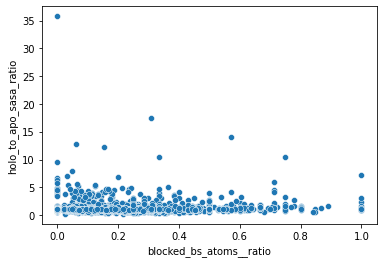

In [156]:
ax = sns.scatterplot(data=df.sample(10000), x='blocked_bs_atoms__ratio', y='holo_to_apo_sasa_ratio')

(0.0, 4.0)

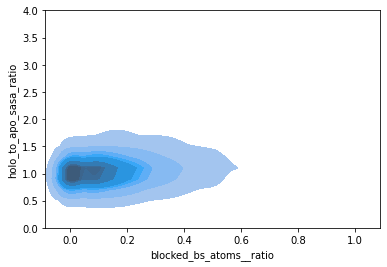

In [157]:
ax = sns.kdeplot(data=df.sample(10000), x='blocked_bs_atoms__ratio', y='holo_to_apo_sasa_ratio',
                 fill=True, )#thresh=0, levels=100, cmap="mako")
ax.set_ylim((0, 4))


Why no correlation? ^^

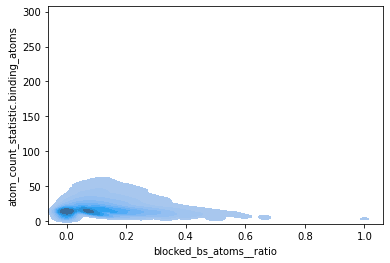

(0.0, 4.0)

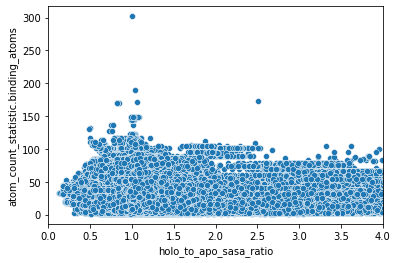

In [158]:
# ax = sns.scatterplot(data=df, x='blocked_bs_atoms__ratio', y='atom_count_statistic.binding_atoms')#thresh=0,
ax = sns.kdeplot(data=df.sample(int(1e5)), fill=True, x='blocked_bs_atoms__ratio', y='atom_count_statistic.binding_atoms')#thresh=0,
plt.show()
# levels=100, cmap="mako")
# df['atom_count_statistic.binding_atoms']
ax = sns.scatterplot(data=df, x='holo_to_apo_sasa_ratio', y='atom_count_statistic.binding_atoms')#thresh=0, levels=100, cmap="mako")
ax.set_xlim((0, 4))




## RMSD

Je tam chyba (správné výsledky až při dalším spuštění), hodnoty nedávají smysl.

In [159]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,analyses.method4.apo_bs_blocked_residues,analyses.method4.apo_bs_blocking_atoms,...,atom_count_statistic.binding_atoms,atom_count_statistic.binding_atoms_observed_in_apo,atom_count_statistic.atoms_of_binding_residues_in_both,atom_count_statistic.atoms_of_binding_residues_missing_in_holo,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio,sasa_decrease_in_apo,holo_to_apo_sasa_ratio
count,1699707.00,1699707.00,1699707.00,1699707.00,1699707.00,1699707.00,1699707.00,1699707.00,1699707.00,1699707.00,...,1699707.00,1699707.00,1699707.00,1699707.00,1699707.00,1699707.00,1699707.00,1699707.00,1699707.00,1699707.00
mean,30.53,30.50,30.50,179.26,187.58,9.35,5.44,5.59,3.65,3.07,...,18.58,18.58,65.67,9.61,3.62,0.14,7.30,0.26,0.03,inf
std,40.31,40.34,40.34,106.88,114.95,10.96,5.62,5.61,3.17,3.88,...,12.45,12.45,40.31,24.46,16.18,0.14,4.36,0.23,0.18,nan
min,0.00,0.00,0.00,0.00,2.18,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,4.00,0.00,0.00,0.00,1.00,0.00,-6.41,0.13
25%,4.12,3.98,3.98,113.50,118.31,2.00,2.00,2.00,2.00,1.00,...,11.00,11.00,38.00,0.00,0.00,0.03,5.00,0.08,-0.03,0.97
50%,18.48,18.51,18.51,156.31,159.05,6.00,4.00,4.00,3.00,2.00,...,15.00,15.00,54.00,0.00,0.00,0.11,6.00,0.24,0.01,1.01
75%,42.76,43.09,43.09,211.03,217.51,13.00,7.00,7.00,5.00,4.00,...,22.00,22.00,85.00,0.00,0.00,0.20,9.00,0.40,0.09,1.09
max,983.15,983.05,983.05,2820.10,2824.90,170.00,93.00,96.00,46.00,63.00,...,302.00,302.00,725.00,340.00,300.00,1.00,95.00,1.00,1.00,inf


In [161]:
print(len(df))

print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] == 1]))

print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] == 0]))


print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] >= 1]))
print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] > 1]))
print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] <= 1]))

1699707
382954
407980
1291727
908773
790934


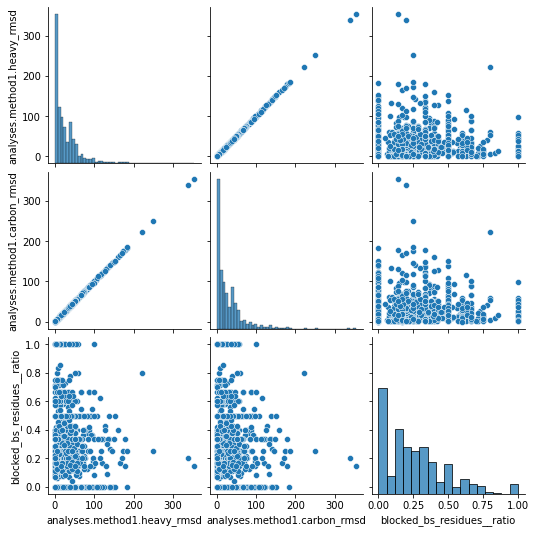

In [160]:
sns.pairplot(df.sample(1000), vars=['analyses.method1.heavy_rmsd', 'analyses.method1.carbon_rmsd', 'blocked_bs_residues__ratio'])

Manual test - pymol

In [162]:
df[df.blocked_bs_atoms__ratio > 0.4].sample(10, random_state=42)

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio,sasa_decrease_in_apo,holo_to_apo_sasa_ratio
1275783,NAG,"[103, 81]",46.531725,46.762767,46.762767,58.200836,68.537792,3,2,2,...,0,3qds,3qdu,B,A,0.500000,2,0.500000,0.150821,1.177608
1447555,GOL,"[85, 41, 84]",19.205698,17.698559,17.698559,89.835558,118.250545,7,4,4,...,0,1bwh,4gn4,A,A,0.428571,3,0.666667,0.240295,1.316300
727758,RU7,"[62, 101, 75, 63]",6.618704,7.321726,7.321726,197.483416,196.207960,16,6,8,...,0,1xei,5v4g,A,A,0.615385,4,1.000000,-0.006501,0.993541
692329,46H,"[300, 226, 222, 80, 81, 304]",50.512761,49.978772,49.978772,169.591985,170.442087,6,5,6,...,0,5p3q,4y3t,A,A,0.555556,6,0.666667,0.004988,1.005013
686603,GOL,"[64, 27]",2.532990,2.465846,2.465846,103.334289,101.349457,4,3,3,...,0,3lko,3b3i,B,B,0.428571,2,1.000000,-0.019584,0.980792
944559,MYR,"[324, 209, 328, 210, 327, 354]",17.998378,16.809225,16.809225,125.003863,115.931913,8,3,4,...,0,6m4r,1ha2,A,A,0.500000,6,0.333333,-0.078252,0.927427
1047903,DO3,"[103, 73, 75, 63, 62, 101]",45.762307,46.537230,46.537230,237.186059,280.242810,21,7,8,...,0,2dqg,5c6j,Y,A,0.428571,6,0.833333,0.153641,1.181532
208307,URI,"[45, 41, 17, 13, 43, 16]",47.022530,47.960171,47.960171,146.103665,200.854900,20,6,10,...,0,1i8f,1lnx,B,E,0.666667,6,0.666667,0.272591,1.374742
714597,GOL,"[14, 17, 20, 21, 73, 15, 16, 22]",29.278760,29.115204,29.115204,146.863824,122.035805,26,9,12,...,0,6m2j,2av7,B,B,0.416667,8,0.625000,-0.203449,0.830945
557183,9U3,"[5, 123, 122]",1.674456,1.671375,1.671375,105.068853,123.070524,6,3,5,...,0,6f9z,6ad5,A,A,0.714286,3,1.000000,0.146271,1.171332
